# Análise de Cluster das Frô

Usando o famoso dataset 'The Iris flower' vou tentar separar as características das sépalas das flores em clusters. Para isso vou utilizar o elbow rule, do método k means, para encontrar o melhor k. Além disso vou ver a diferença quando a gente padroniza as variáveis.

## Importar bibliotecas

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Carregar os dados

In [57]:
data = pd.read_csv("iris-dataset.csv")
data

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Gráficos

Vou focar no formato da sépala

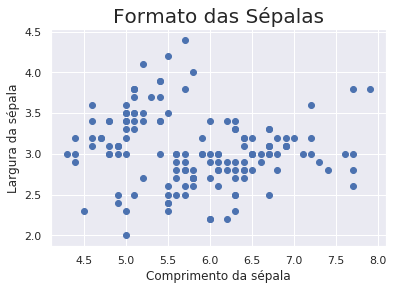

In [58]:
x = data['sepal_length']
y = data['sepal_width']
plt.scatter(x,y)
plt.title('Formato das Sépalas', size=20)
plt.xlabel('Comprimento da sépala')
plt.ylabel('Largura da sépala')
plt.show()

Eu consigo visualizar pelo menos dois clusters (dois grandes blocos), separados por uma diagonal crescente, que se inicia em y=2,5. Esses dados se separariam em: comprimento pequeno x grande largura e comprimentos variados x larguras menores e médias. Porém, isso não faz muito sentido.

Portanto, dá para pensar em 5 clusters: comprimento pequeno x largura pequena;  comprimento pequeno x largura média; comprimento médio x largura pequena; comprimento médio x largura média; comprimento grande x largura média.

## Clustering 

In [63]:
x = data.iloc[:,0:2] #separar os dados das sépalas
x

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [64]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [65]:
clusters = kmeans.fit_predict(x) #ver cada cluster (1 ou 0) de cada observação
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1], dtype=int32)

In [66]:
data_clusters = x.copy() #criando uma copia dos dados iniciais cortados
data_clusters['cluster'] = clusters #adicionando uma coluna com os clusters encontrados
data_clusters

,sepal_length,sepal_width,cluster
0,5.1,3.5,1
1,4.9,3.0,1
2,4.7,3.2,1
3,4.6,3.1,1
4,5.0,3.6,1
...,...,...,...
145,6.7,3.0,0
146,6.3,2.5,0
147,6.5,3.0,0
148,6.2,3.4,0


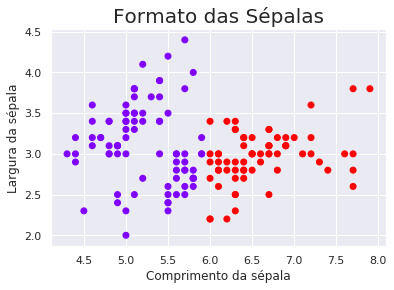

In [50]:
plt.scatter(data_clusters['sepal_length'], data_clusters['sepal_width'], 
            c=data_clusters['cluster'], cmap='rainbow') #color, sequence, or sequence of color
plt.title('Formato das Sépalas', size=20)
plt.xlabel('Comprimento da sépala')
plt.ylabel('Largura da sépala')
plt.show()

Os valores de comprimento são maiores que os valores de largura, o comprimento da sépala foi a única feature considerada, por isso é possível ver uma linha vertical, no valor x = ~6. Pra resolver isso é interessante padronizar as variáveis. 

## Padronizando as variáveis

In [12]:
from sklearn import preprocessing

In [67]:
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.90068117,  1.03205722],
       [-1.14301691, -0.1249576 ],
       [-1.38535265,  0.33784833],
       [-1.50652052,  0.10644536],
       [-1.02184904,  1.26346019],
       [-0.53717756,  1.95766909],
       [-1.50652052,  0.80065426],
       [-1.02184904,  0.80065426],
       [-1.74885626, -0.35636057],
       [-1.14301691,  0.10644536],
       [-0.53717756,  1.49486315],
       [-1.26418478,  0.80065426],
       [-1.26418478, -0.1249576 ],
       [-1.87002413, -0.1249576 ],
       [-0.05250608,  2.18907205],
       [-0.17367395,  3.11468391],
       [-0.53717756,  1.95766909],
       [-0.90068117,  1.03205722],
       [-0.17367395,  1.72626612],
       [-0.90068117,  1.72626612],
       [-0.53717756,  0.80065426],
       [-0.90068117,  1.49486315],
       [-1.50652052,  1.26346019],
       [-0.90068117,  0.56925129],
       [-1.26418478,  0.80065426],
       [-1.02184904, -0.1249576 ],
       [-1.02184904,  0.80065426],
       [-0.7795133 ,  1.03205722],
       [-0.7795133 ,

In [68]:
kmeans_nova = KMeans(2)
clusters_nova = x.copy() #copiando os dados iniciais (cortados em 2 colunas)
clusters_nova['cluster'] = kmeans_nova.fit_predict(x_scaled) #adicionando nova coluna
clusters_nova

,sepal_length,sepal_width,cluster
0,5.1,3.5,1
1,4.9,3.0,1
2,4.7,3.2,1
3,4.6,3.1,1
4,5.0,3.6,1
...,...,...,...
145,6.7,3.0,0
146,6.3,2.5,0
147,6.5,3.0,0
148,6.2,3.4,0


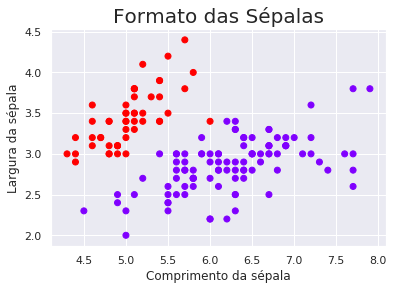

In [69]:
plt.scatter(clusters_nova['sepal_length'], clusters_nova['sepal_width'], 
            c=clusters_nova['cluster'], cmap='rainbow') #color, sequence, or sequence of color
plt.title('Formato das Sépalas', size=20)
plt.xlabel('Comprimento da sépala')
plt.ylabel('Largura da sépala')
plt.show()

Fez mais sentido né?

## Encontrando melhor valor de K

In [70]:
# Méotodo WCSS para encontrar o melhor valor de KMeans
wcss = [] #vetor vazio
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
wcss

[300.0,
 168.39262198361087,
 103.78443895265738,
 79.71197040020962,
 61.763287316926274,
 52.13668525175611,
 44.58654483942183,
 36.26255277369073,
 30.516038160335825]

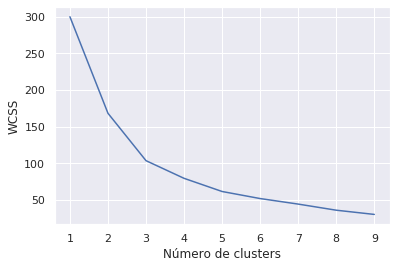

In [71]:
plt.plot(range(1,10),wcss)
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

In [72]:
kmeans_nova = KMeans(5)
kmeans_nova.fit(x_scaled)
clusters_nova = x.copy() #copiando os dados iniciais (cortados em 2 colunas)
clusters_nova['cluster'] = kmeans_nova.fit_predict(x_scaled) #adicionando nova coluna
clusters_nova

#os dados não foram alterados, mas os clusters foram calculados de acordo com o dado padronizado!!!!

,sepal_length,sepal_width,cluster
0,5.1,3.5,1
1,4.9,3.0,1
2,4.7,3.2,1
3,4.6,3.1,1
4,5.0,3.6,4
...,...,...,...
145,6.7,3.0,0
146,6.3,2.5,3
147,6.5,3.0,0
148,6.2,3.4,0


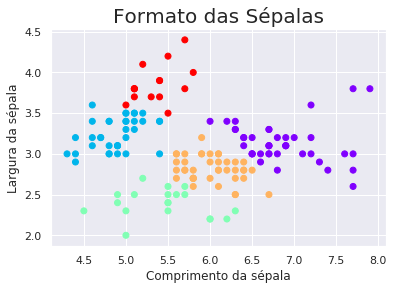

In [73]:
plt.scatter(clusters_nova['sepal_length'], clusters_nova['sepal_width'], 
            c=clusters_nova['cluster'], cmap='rainbow') #color, sequence, or sequence of color
plt.title('Formato das Sépalas', size=20)
plt.xlabel('Comprimento da sépala')
plt.ylabel('Largura da sépala')
plt.show()

Gostei desse arranjo com 5 clusters pois a separação foi exatamente a que visualizei inicialmente.